## LOWESS (Locally Weighted Scatterplot Smoothing)
LOESS or LOWESS are non-parametric regression methods that combine multiple regression models in a k-nearest-neighbor-based meta-model.  
They address situations in which the classical procedures do not perform well or cannot be effectively applied without undue labor.  
LOESS combines much of the simplicity of linear least squares regression with the flexibility of nonlinear regression.  
It does this by fitting simple models to localized subsets of the data to build up a function that describes the variation in the data, point by point.  

## Locally Weighted Linear Regression
Loess is a non-parametric algorithm, that is, the model does not learn a fixed set of parameters as is done in ordinary linear regression.  
Rather parameters 'theta' are computed individually for each query point x.  
While computing 'theta', a higher “preference” is given to the points in the training set lying in the vicinity of x than the points lying far away from x.

### Procedure
A linear function is fitted only on a local set of points delimited by a region, using weighted least squares.  
The weights are given by the heights of a kernel function (or weighting function) giving:  
--> more weights to points near the target point x0 whose response is being estimated  
--> less weight to points further away  
We obtain then a fitted model that retains only the point of the model that are close to the target point (x0).  
The target point then moves away on the x axis and the procedure repeats for each points.

### Advantages
Allows us to put less care into selecting the features in order to avoid overfitting.  
Does not require specification of a function to fit a model to all of the data in the sample.  
Only a Kernel function and smoothing or bandwidth parameters are required.  
Very flexible, can model complex processes for which no theoretical model exists.  
Considered one of the most attractive of the modern regression methods for applications that fit the general framework of least squares regression but which have a complex deterministic structure.

### Disadvantages
Requires to keep the entire training set in order to make future predictions.  
The number of parameters grows linearly with the size of the training set.  
Computationally intensive, as a regression model is computed for each point.  
Requires fairly large, densely sampled data sets in order to produce good models.  
This is because LOESS relies on the local data structure when performing the local fitting.  
Does not translate into a model that can be described by a mathematical formula. so it can't be used for mechanistic modelling.  
Like other least square methods, prone to the effect of outliers in the data set.  
Although can be generalized to p dimensions, local regression can perform poorly if p is much larger than about 3 or 4 because there will generally be very few training observations close to x0.  
Nearest-neighbors regression suffers from a similar problem in high dimensions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg

### weight function

In [2]:
def weight_func(xi, x0, tau=0.0707):
    delta = (xi - x0)**2
    weight = np.exp(-1*(delta)/(2*tau*tau))
    return weight
print("weight_func")

weight_func


### Implementation in python (using bell shaped kernel)

In [3]:
def lowess_bell_shape(X, Y, tau=0.0707):
    m = len(Y)
    result = np.zeros(m)
    W = np.array([np.exp(-1*(X-X[i])**2/(2*tau*tau)) for i in range(m)])
    
    #Looping through all x-points
    for i in range(m):
        weights = W[:, i]
        b = np.array([np.sum(weights * Y), np.sum(weights * Y * X)])
        A = np.array([[np.sum(weights), np.sum(weights * X)], [np.sum(weights * X), np.sum(weights * X * X)]])
        theta = linalg.solve(A, b)
        result[i] = theta[0] + theta[1] * X[i]
    return result
## END
print("lowess_bell_shape")

lowess_bell_shape


### Implementation in Python using span kernel and robustyfing iterations

In [4]:
def lowess_regression(X, Y, f=1.0/3.0, itr = 5):
    # yet to implement
    pass
## END
print("lowess_regression")

lowess_regression


### Applying Loess to a noisy non linear dataset
As a case study, consider a sine function with random gaussian noise added.

In [5]:
n = 100
x = np.linspace(0, 1, n)
noise = np.random.normal(loc=0, scale=0.25, size=100)
y = np.sin(x * 1.5 * np.pi )
y_with_noise = y + noise

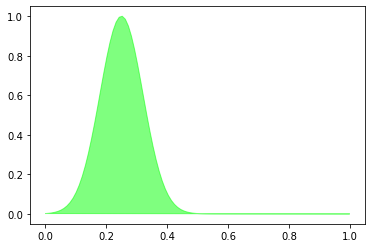

In [6]:
plt.fill(x, weight_func(x, 0.25), color='lime', alpha=0.5, label='Kernel')

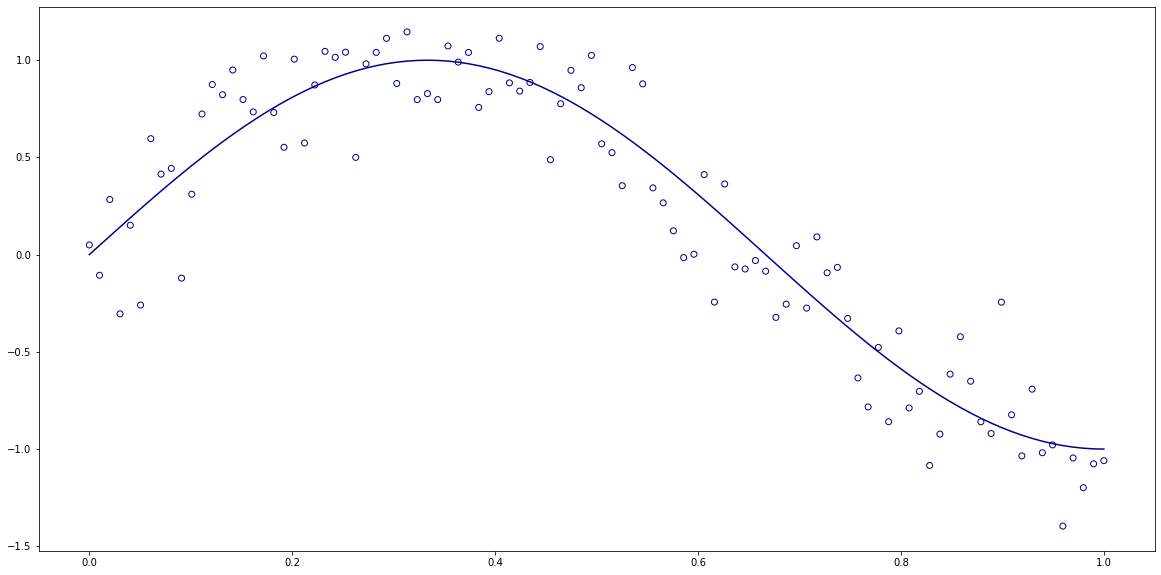

In [7]:
plt.figure(figsize=(20,10))
plt.plot(x, y, color='darkblue', label='f(x)')
plt.scatter(x, y_with_noise, facecolors='none', edgecolor='darkblue', label='sin() + noise')

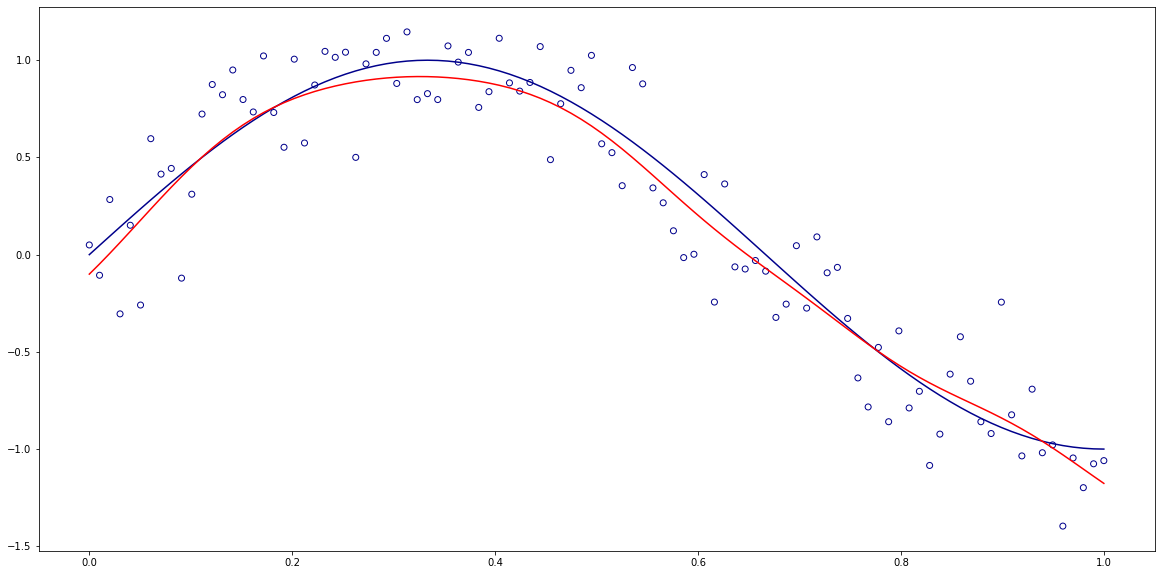

In [8]:
y_from_bell_curve = lowess_bell_shape(x, y_with_noise)
plt.figure(figsize=(20,10))
plt.plot(x, y, color='darkblue', label='f(x)')
plt.scatter(x, y_with_noise, facecolors='none', edgecolor='darkblue', label='sin() + noise')
plt.plot(x, y_from_bell_curve, color='red', label='sin() + noise')

### Alternative implementations using Statsmodel

In [9]:
import statsmodels.api as sm
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(y, x, frac=1.0/3.0, it=3, return_sorted = False)

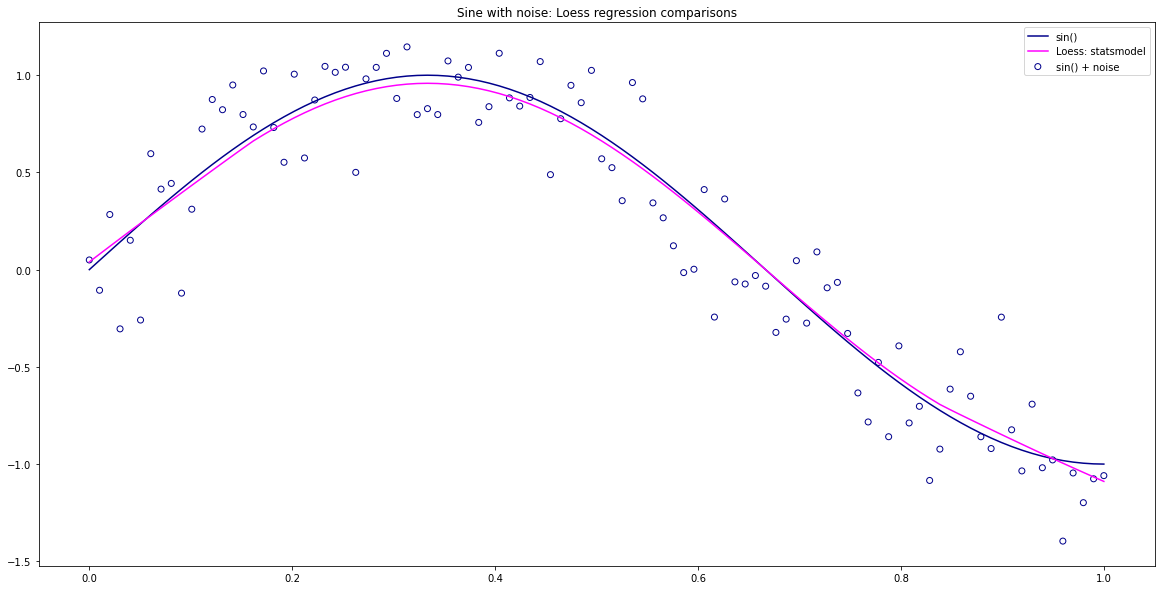

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, color='darkblue', label='sin()')
plt.scatter(x, y_with_noise, facecolors='none', edgecolor='darkblue', label='sin() + noise')
plt.plot(x, yest_sm, color='magenta', label='Loess: statsmodel')
plt.legend()
plt.title('Sine with noise: Loess regression comparisons')
plt.show()

### Comparing the results

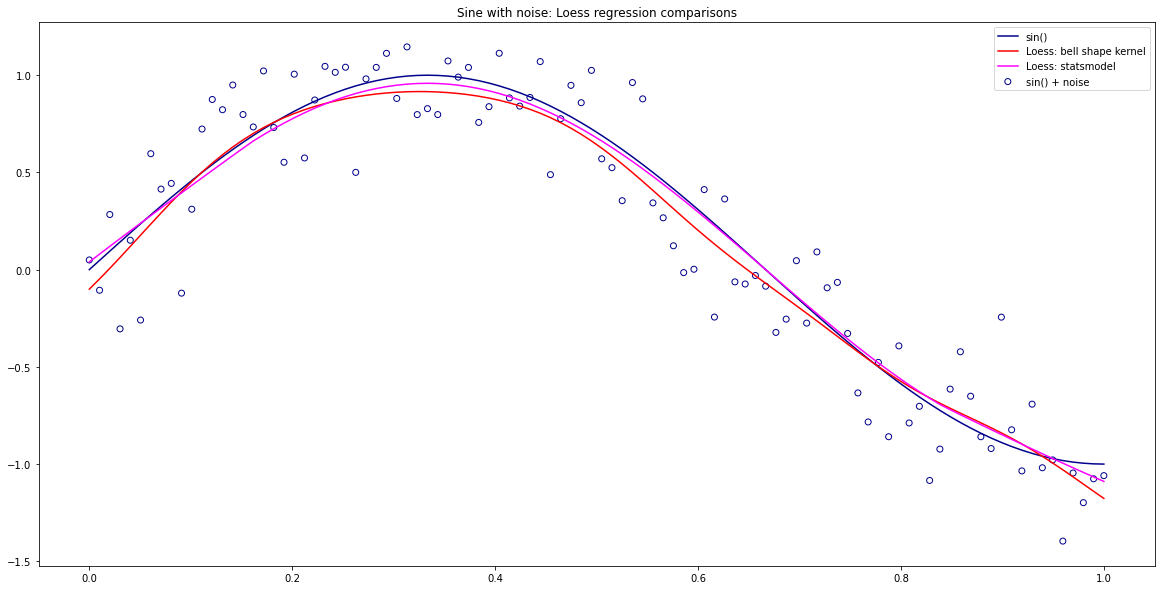

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, color='darkblue', label='sin()')
plt.scatter(x, y_with_noise, facecolors='none', edgecolor='darkblue', label='sin() + noise')
plt.plot(x, y_from_bell_curve, color='red', label='Loess: bell shape kernel')
plt.plot(x, yest_sm, color='magenta', label='Loess: statsmodel')
plt.legend()
plt.title('Sine with noise: Loess regression comparisons')
plt.show()

### For explanation and details

### https://xavierbourretsicotte.github.io/loess.html